In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

(7178, 30)
Index(['mut_id', 'md5', 'pmd_id', 'nr', 'prot_acc_version', 'snp_id',
       'mut_real', 'wt', 'mut', 'prot_pos', 'chrom', 'chrom_pos', 'ref_allele',
       'alt_allele', 'function', 'source', 'crossref', 'function_summarized',
       'class', 'SIFT_score', 'Polyphen2_HVAR_score', 'MetaRNN_score',
       'REVEL_score', 'MVP_score', 'CADD_raw_score',
       'integrated_fitCons_score', 'phyloP17way_primate_score',
       'phastCons17way_primate_score', 'bStatistic_score', 'pred'],
      dtype='object')


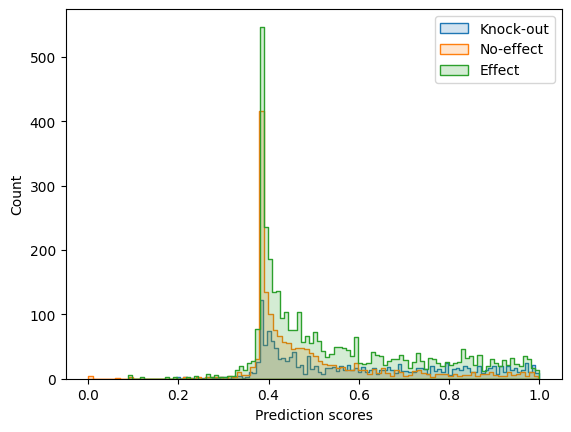

In [2]:
# PMD prediction scores distribution plot
def plot_distribution(result_df, n_samples=None):
    df = result_df.copy(deep=True)
    plt.cla()

    effect = df[df["class"]=="Effect"]
    knock_out = df[df["class"]=="Knock-out"]
    no_effect = df[df["class"]=="No-effect"]

    # print(effect.shape, knock_out.shape, no_effect.shape)
    bins = 100 # 20, 100, 500
    
    sns.histplot(knock_out["pred"], bins=bins, label=f"Knock-out", element="step", alpha=.2)
    sns.histplot(no_effect["pred"], bins=bins, label=f"No-effect", element="step", alpha=.2)
    sns.histplot(effect["pred"], bins=bins, label=f"Effect", element="step", alpha=.2)
    # sns.histplot(result_df, x="pred", y="class", element="step", hue="class", bins=bins, alpha=0.2)
    
    plt.legend()
    plt.xlabel("Prediction scores")
    plt.ylabel("Count")
    plt.show()

model_dir = "sequnet_dunham"
model_name = "sequnet" 
result_df = pd.read_csv(home_dir+f"models/{model_dir}/outputs/{model_name}/pmd/preds_{model_name}_masked_1.tsv", sep="\t")
model_pred_col = "pred"
result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]
print(result_df.shape)
print(result_df.columns)
result_df["class"].value_counts()
plot_distribution(result_df, n_samples=None)

(35035, 38)
Index(['snp_id', 'gene_name', 'mane_refseq_prot', 'mane_refseq_nuc',
       'mane_status', 'chrom_acc_version', 'chrom_num', 'source_ref_allele',
       'source_alt_alleles', 'alfa_chrom_pos', 'alfa_ref_allele',
       'alfa_alt_allele', 'alfa_alt_alleles', 'prot_variant',
       'prot_acc_version', '1indexed_prot_mt_pos', 'wt_aa', 'mt_aa',
       'wt_aa_1letter', 'mt_aa_1letter', 'wt_population', 'mt_population',
       'wt_freq', 'mt_freq', 'class', 'MetaRNN_score', 'MVP_score',
       'SIFT_score', 'Polyphen2_HVAR_score', 'CADD_raw', 'REVEL_score',
       'integrated_fitCons_score', 'phyloP17way_primate',
       'phastCons17way_primate', 'bStatistic', 'n_methods_having_preds',
       'is_selected_prev', 'pred'],
      dtype='object')


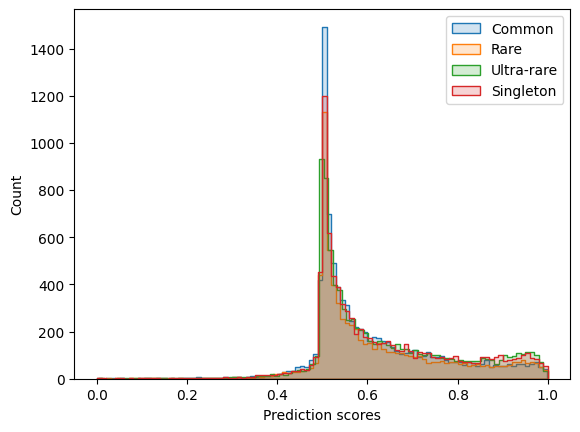

In [2]:
# popu-freq prediction scores distribution plot
def plot_distribution(result_df, n_samples=None):
    df = result_df.copy(deep=True)
    plt.cla()

    common = df[df["class"]=="Common"]
    rare = df[df["class"]=="Rare"]
    ultra_rare = df[df["class"]=="Ultra-rare"]
    singleton = df[df["class"]=="Singleton"]

    # print(effect.shape, knock_out.shape, no_effect.shape)
    bins = 100 # 20, 100, 500
    
    sns.histplot(common["pred"], bins=bins, label=f"Common", element="step", alpha=.2)
    sns.histplot(rare["pred"], bins=bins, label=f"Rare", element="step", alpha=.2)
    sns.histplot(ultra_rare["pred"], bins=bins, label=f"Ultra-rare", element="step", alpha=.2)
    sns.histplot(singleton["pred"], bins=bins, label=f"Singleton", element="step", alpha=.2)
    # sns.histplot(result_df, x="pred", y="class", element="step", hue="class", bins=bins, alpha=0.2)
    
    plt.legend()
    plt.xlabel("Prediction scores")
    plt.ylabel("Count")
    plt.show()

model_dir = "sequnet_dunham"
model_name = "sequnet" 
result_df = pd.read_csv(home_dir+f"models/{model_dir}/outputs/{model_name}/popu_freq/preds_{model_name}_masked.tsv", sep="\t")
model_pred_col = "pred"
result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]
print(result_df.shape)
print(result_df.columns)
result_df["class"].value_counts()
plot_distribution(result_df, n_samples=None)

(9460, 29)
Index(['clinvar_id', 'gene_symbol', 'gene_id', 'snp_id', 'chrom_acc_version',
       'chrom_pos', 'ref_allele', 'alt_allele', 'prot_acc_version', 'prot_pos',
       'wt', 'mut', 'class', 'chrom', 'SIFT_score', 'Polyphen2_HVAR_score',
       'MetaRNN_score', 'REVEL_score', 'MVP_score', 'CADD_raw_score',
       'integrated_fitCons_score', 'phyloP17way_primate_score',
       'phastCons17way_primate_score', 'bStatistic_score', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'pred'],
      dtype='object')


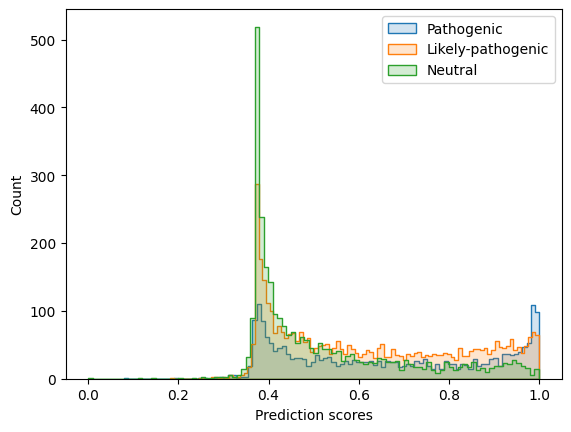

In [4]:
# patho prediction scores distribution plot
def plot_distribution(result_df, n_samples=None):
    df = result_df.copy(deep=True)
    plt.cla()

    patho = df[df["class"]=="Pathogenic"]
    likelypatho = df[df["class"]=="Likely-pathogenic"]
    neutral = df[(df["class"]!="Pathogenic") & (df["class"]!="Likely-pathogenic")]
    # print(patho.shape, likelypatho.shape, neutral.shape)

    bins = 100 # 20, 100, 500
    
    sns.histplot(patho["pred"], bins=bins, label=f"Pathogenic", element="step", alpha=.2)
    sns.histplot(likelypatho["pred"], bins=bins, label=f"Likely-pathogenic", element="step", alpha=.2)
    sns.histplot(neutral["pred"], bins=bins, label=f"Neutral", element="step", alpha=.2)
    
    plt.legend()
    plt.xlabel("Prediction scores")
    plt.ylabel("Count")
    plt.show()

model_dir = "sequnet_dunham"
model_name = "sequnet" 
result_df = pd.read_csv(home_dir+f"models/{model_dir}/outputs/{model_name}/patho/preds_{model_name}_masked.tsv", sep="\t")
model_pred_col = "pred"
result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]
print(result_df.shape)
print(result_df.columns)
result_df["class"].value_counts()
plot_distribution(result_df, n_samples=None)